## Analyzing google_search_history script

In [1]:
from google_search_history import process
from tests import test_google_search_history, simulation_google_search_history
from pathlib import Path
import pandas as pd
import io

### 1. Testing functionality of script

In [2]:
test_google_search_history.test_extract() # if not AssertionError: outcome is as expected

In [3]:
test_google_search_history.test_process() # if not AssertionError: outcome is as expected

### 2. Use case: simulated Google Takeout data

In [4]:
# # Create seeded simulation data
# file_data = POC_google_search_history.BrowserHistory(
#         n=1000, site_diff=0.15, time_diff=True, seed=0, fake=False)
# POC_google_search_history.__createZip(file_data)

In [5]:
data = Path('tests/data/takeout.zip') # Enter path to takeout.zip data
output = process(data)

In [6]:
print(output['summary'])

 
    With this research we want to invesitgate how news consumption has changed during/after the COVID-19 related Dutch 
    curfew. To examine this, we looked at your Google Search History. First, we divided your browser history into three 
    periods: before the start of the curfew (before 2021-01-23), during the curfew (between 2021-01-23 and 2021-04-28) 
    and post curfew (after 2021-04-28). For each period, we counted how many times you searched for a news website 
    versus any another type of website (i.e., news/other). While counting, we also took the time of day 
    (i.e., morning/afternoon/evening/night) into account. 
     
    read_files: BrowserHistory.json
    Your earliest web search was on 2020-10-20, 
    The Dutch curfew took place between 2021-01-23 and 2021-04-28,
    Your latest web search was on 2021-07-23.
    


In [7]:
overview = output['data_frames'][0]
overview

,Curfew,Website,Time,Searches
0,before,news,morning,13
1,before,news,afternoon,11
2,before,news,evening,13
3,before,news,night,13
4,before,other,morning,66
5,before,other,afternoon,72
6,before,other,evening,79
7,before,other,night,66
8,during,news,morning,21
9,during,news,afternoon,19


In [8]:
curf_web = overview.groupby(['Website']).sum()
curf_web['%'] = curf_web.apply(lambda x: x/x.sum())
curf_web

,Searches,%
Website,,
news,200,0.2
other,800,0.8


In [9]:
curf_web = overview.groupby(['Curfew', 'Website']).sum()
curf_web['%'] = curf_web.groupby(level=0).apply(lambda x: x/x.sum())
curf_web

Searches         %
Curfew Website                    
before news           50  0.150150
       other         283  0.849850
during news          100  0.299401
       other         234  0.700599
post   news           50  0.150150
       other         283  0.849850

In [10]:
curf_time_web = overview.groupby(['Curfew', 'Time', 'Website']).sum()
curf_time_web['%'] = curf_time_web.groupby(['Curfew', 'Time']).apply(lambda x: x/x.sum())
curf_time_web

Searches         %
Curfew Time      Website                    
before afternoon news           11  0.132530
                 other          72  0.867470
       evening   news           13  0.141304
                 other          79  0.858696
       morning   news           13  0.164557
                 other          66  0.835443
       night     news           13  0.164557
                 other          66  0.835443
during afternoon news           19  0.292308
                 other          46  0.707692
       evening   news           32  0.278261
                 other          83  0.721739
       morning   news           21  0.304348
                 other          48  0.695652
       night     news           28  0.329412
                 other          57  0.670588
post   afternoon news           12  0.134831
                 other          77  0.865169
       evening   news           14  0.150538
                 other          79  0.849462
       morning   news           11  0.154930
                 other          60  0.845070
       night     news           13  0.162500
                 other          67  0.837500

<AxesSubplot:xlabel='Website', ylabel='Searches'>

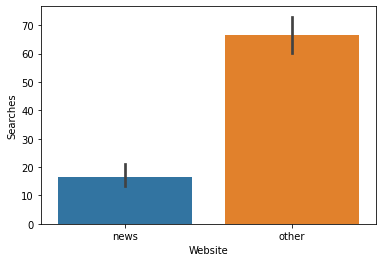

In [11]:
import seaborn as sns
sns.barplot(x='Website', y='Searches', data=overview)

<AxesSubplot:xlabel='Curfew', ylabel='Searches'>

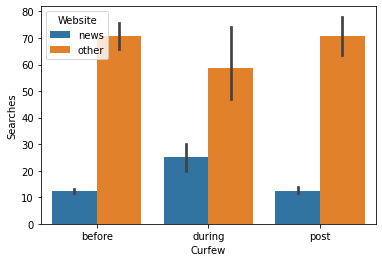

In [12]:
sns.barplot(x='Curfew', y='Searches', hue='Website', data=overview)

<AxesSubplot:xlabel='Time', ylabel='Searches'>

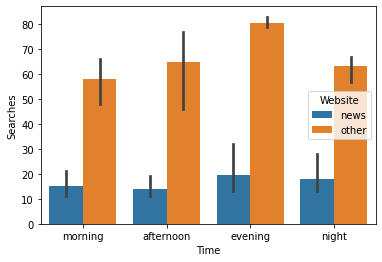

In [13]:
sns.barplot(x='Time', y='Searches', hue='Website', data=overview)